# Boston Housing Dataset Regression Problem

Boston Housing dataset describes 13 numerical properties of houses in Boston suburbs. The problem is modeling the price of houses in thousands of dollars with given properties. Following list is an example of the attributes:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - proportion of blacks by town
- MEDV - Median value of owner-occupied homes in \$1000's

Lets try to use neural network model to provide reasonable price of house given the above attributes.

In [1]:
import keras
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import boston_housing

from sklearn import preprocessing

/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/skim0119/venv/GenP3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Data
- Total 506 house data with 13 properties, and price of the house.

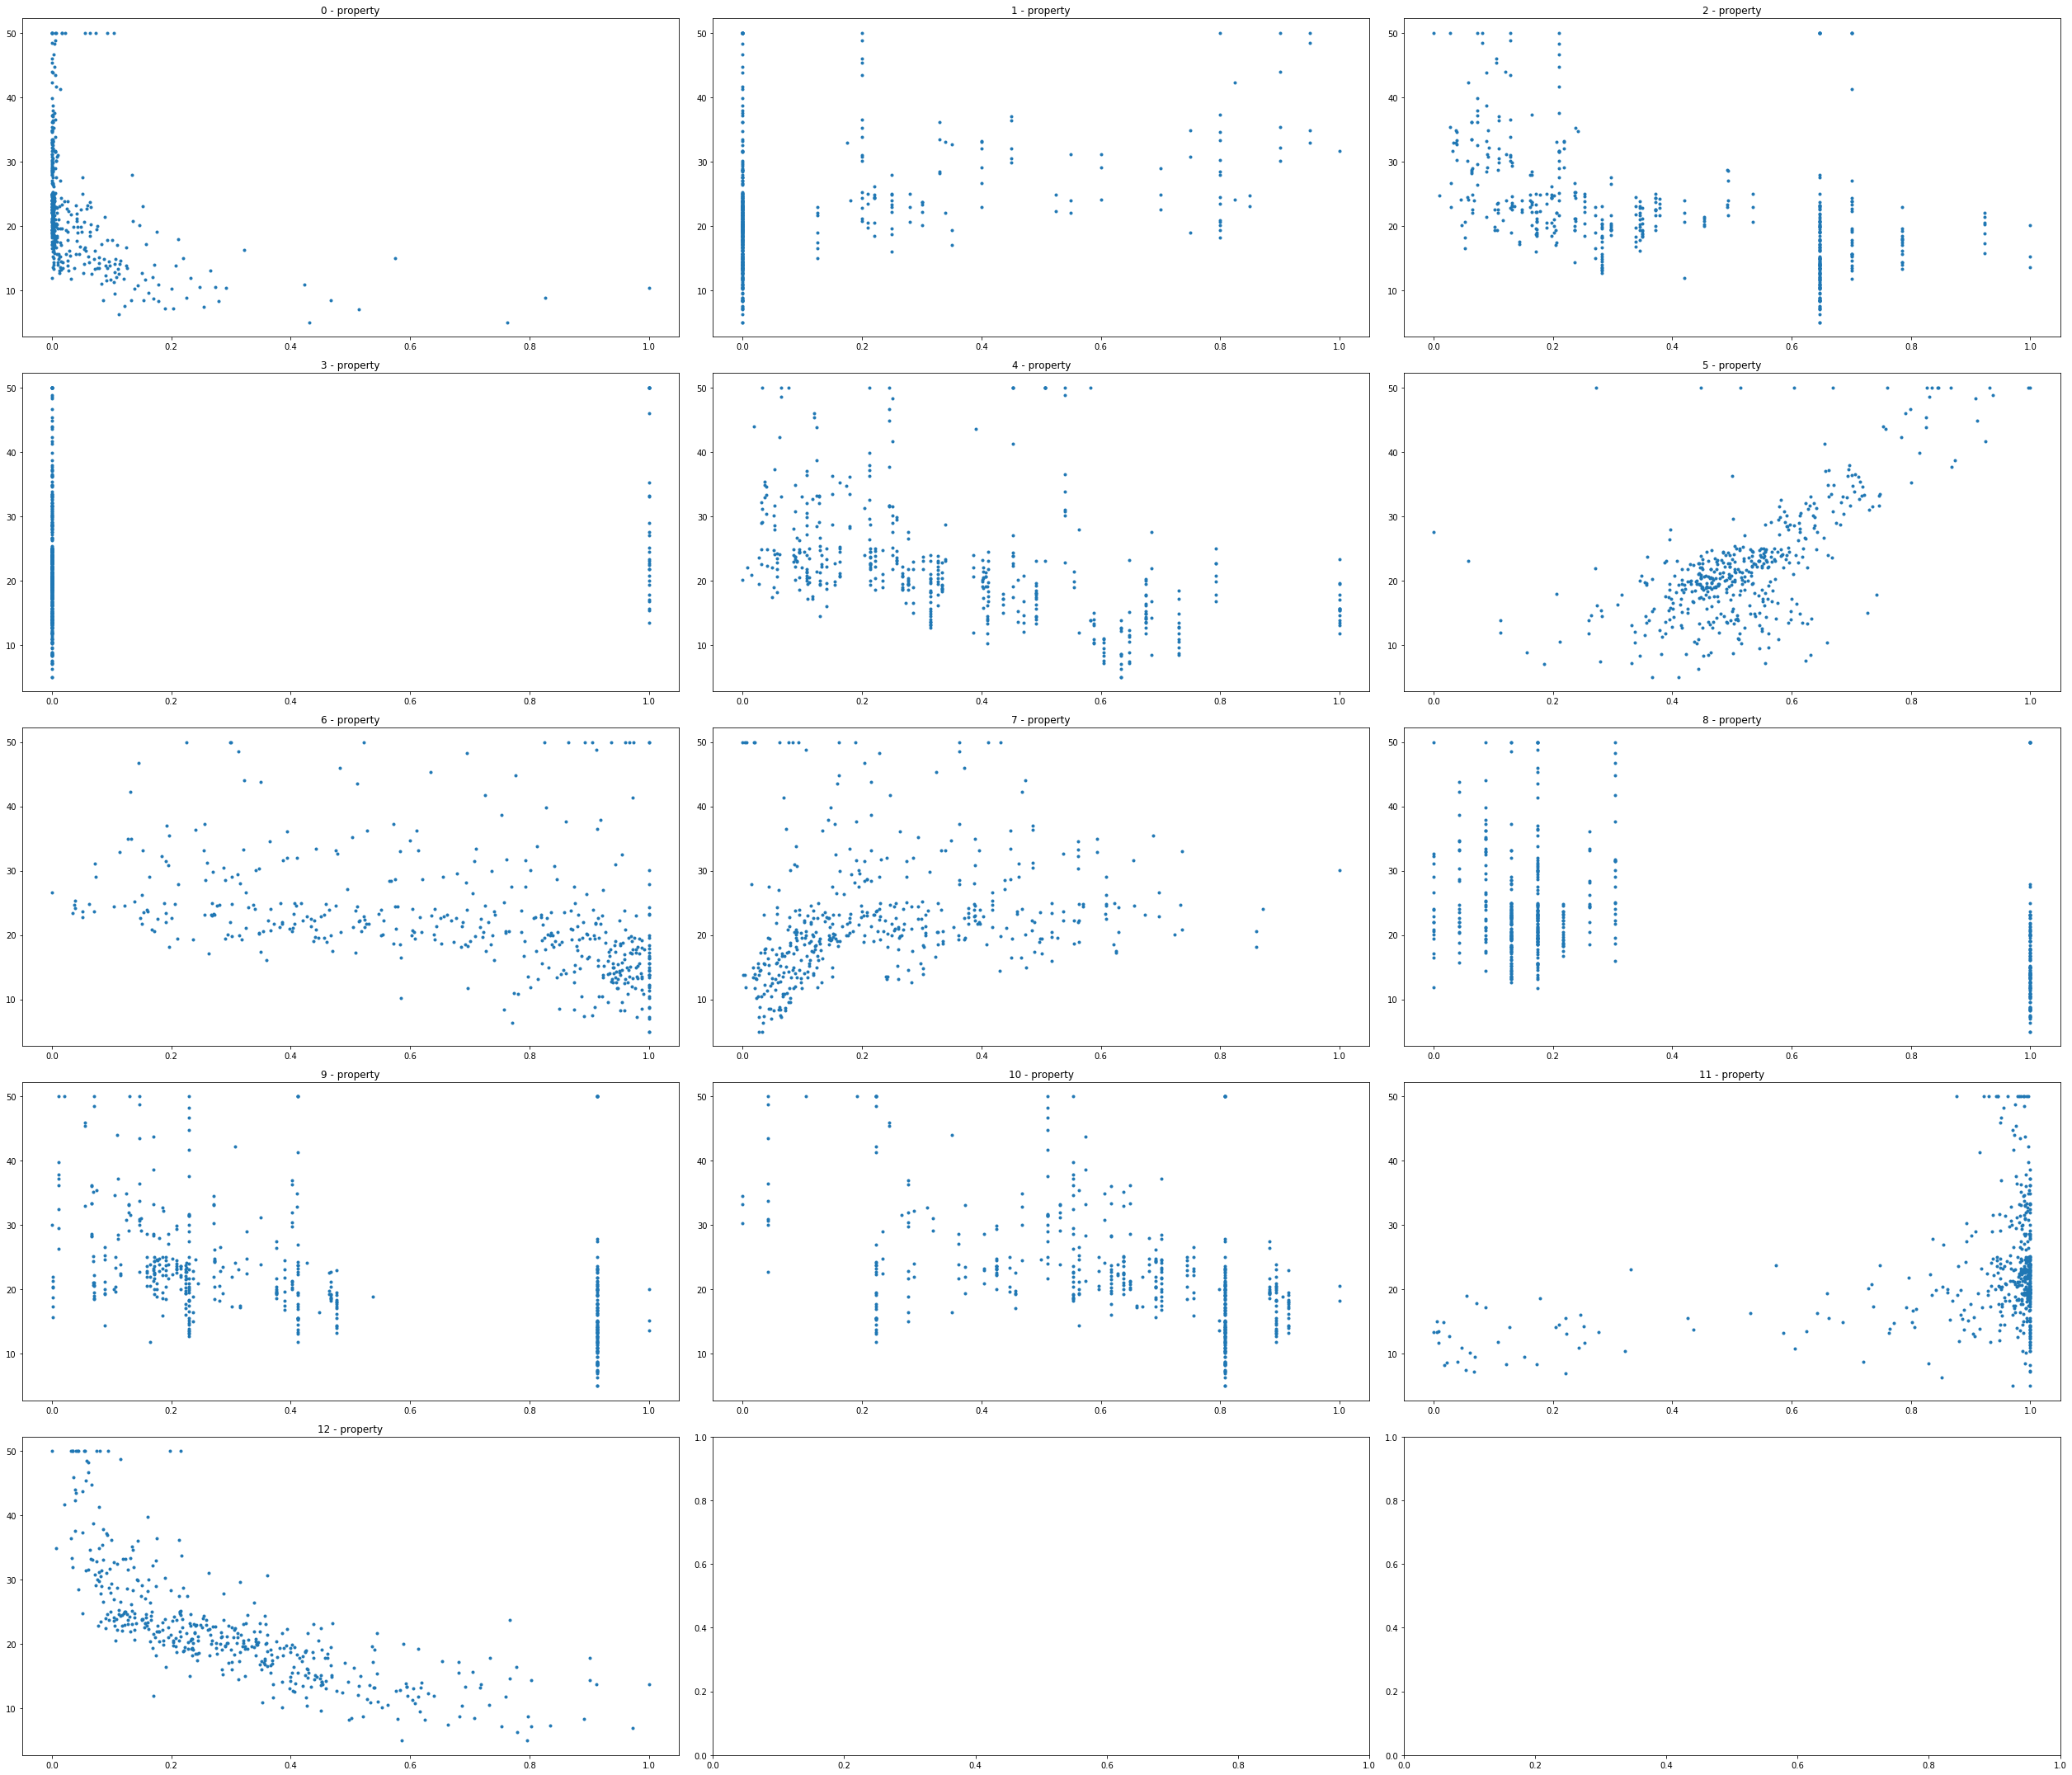

In [2]:
# Prepare Data
def dataset(ratio=0.1):
    (X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split=ratio)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = dataset()

# Visualize Data
nProperties = X_train.shape[1]
plt.close('all')
plt.rcParams["figure.figsize"] = [35,30]
f, axarr = plt.subplots(int(nProperties/3)+1, 3)
for i in range(nProperties):
    axarr[int(i/3), i%3].plot(X_train[:,i],y_train, '.')
    axarr[int(i/3), i%3].set_title('%d - property' % i)
f.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

## Model
- Lets use a variable 'nHidden' to decide number of node in hidden layer
- Compile:
    - SGD: Stochastic gradient descent optimizer
    - mse: mean squared error

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# Model
nHidden = 10
nInput = 13
nOutput = 1

model = Sequential()
model.add(Dense(nHidden, input_dim=nInput))
model.add(Activation('relu'))
model.add(Dense(nOutput))

# Compile
model.compile(loss='mse', optimizer='sgd')

## Training

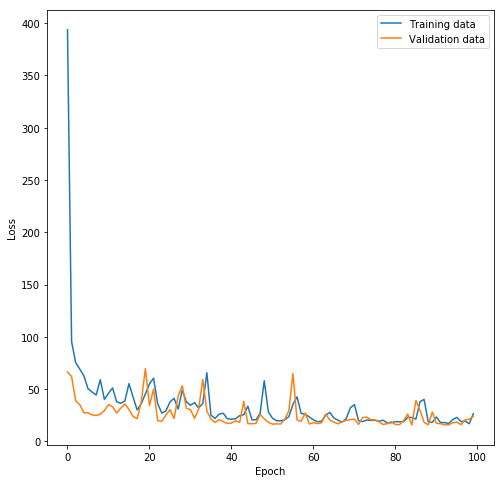

In [9]:
# Fitting
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=0)

# Plotting Loss
plt.rcParams["figure.figsize"] = [8,8]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc=0)
plt.show()

## Result

In [10]:
performace = model.evaluate(X_test, y_test, batch_size=100, verbose=0)
print('Loss = %.2f' % (performace))

Loss = 53.62
